In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

,Race,Time,Time to race


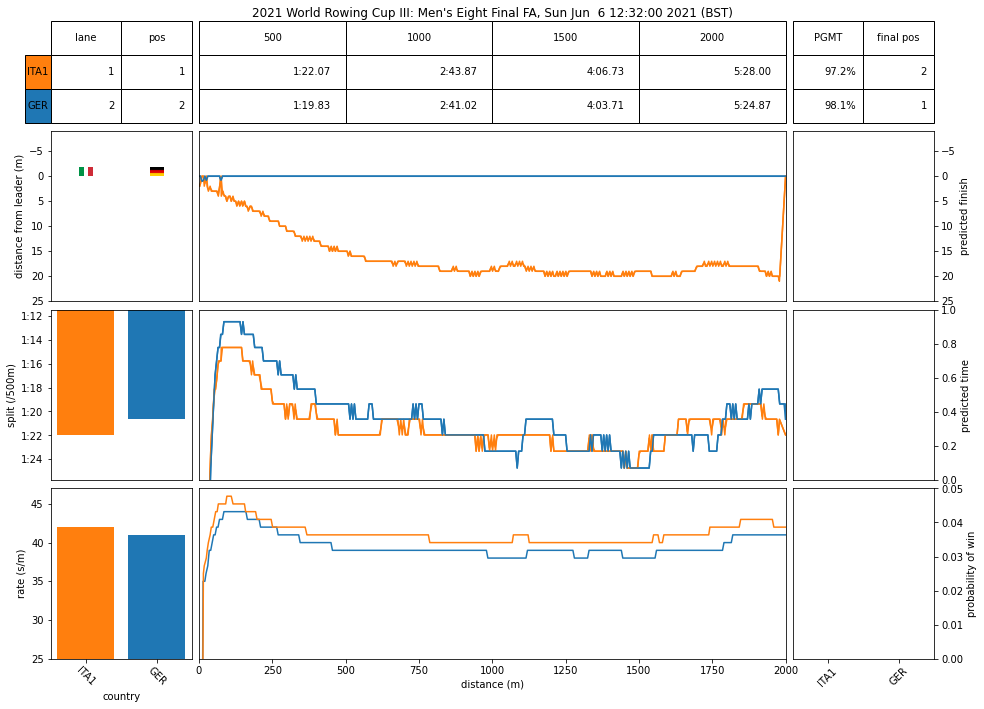

In [3]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))

dash.live_notebook_dashboard()

api.show_next_races()

In [11]:
comp_pgmts

,BoatClass,Country,Rank,Lane,Date,Time,worldBestTime,PGMT
269,LW2x,NED,1,5,2021-06-06 10:17:00,6:43.79,6:47.69,1.009658
274,LW2x,ITA1,2,4,2021-06-06 10:17:00,6:50.32,6:47.69,0.993590
267,LW2x,NED,1,1,2021-06-04 09:40:00,6:51.89,6:47.69,0.989803
308,W4-,NED,1,3,2021-06-06 09:32:00,6:20.21,6:14.36,0.984614
273,LW2x,SUI,3,2,2021-06-06 10:17:00,6:54.63,6:47.69,0.983262
...,...,...,...,...,...,...,...,...
118,W1x,PUR,4,3,2021-06-04 09:10:00,8:17.25,7:07.71,0.860151
78,M1x,FIN,6,5,2021-06-04 09:20:00,7:36.02,6:30.74,0.856848
191,M2-,FRA1,5,1,2021-06-04 08:10:00,7:13.90,6:08.50,0.849274
128,W1x,PUR,4,1,2021-06-04 13:12:00,8:23.70,7:07.71,0.849136


In [46]:
comp_pgmts.reset_index().groupby('BoatClass').first().sort_values('PGMT', ascending=False)

,index,Country,Rank,Lane,Date,Time,worldBestTime,PGMT
BoatClass,,,,,,,,
LW2x,269,NED,1,5,2021-06-06 10:17:00,6:43.79,6:47.69,1.009658
W4-,308,NED,1,3,2021-06-06 09:32:00,6:20.21,6:14.36,0.984614
W4x,197,GER,1,3,2021-06-06 10:32:00,6:13.43,6:06.84,0.982353
M4x,283,ITA1,1,2,2021-06-06 10:47:00,5:38.41,5:32.26,0.981827
W2x,12,NED,1,4,2021-06-06 09:02:00,6:44.79,6:37.31,0.981521
M2x,27,POL,1,3,2021-06-06 09:17:00,6:06.50,5:59.72,0.981501
M8+,323,GER,1,2,2021-06-06 11:32:00,5:24.87,5:18.68,0.980946
W2-,315,DEN,1,6,2021-06-06 08:35:00,6:57.68,6:49.08,0.979410
M1x,57,NOR1,1,6,2021-06-06 11:02:00,6:39.12,6:30.74,0.979004


In [4]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('BoatClass')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

,Country,Rank,Lane,Date,Time,worldBestTime,PGMT
BoatClass,,,,,,,
LW2x,NED,1,5,2021-06-06 10:17:00,6:43.79,6:47.69,1.009658
W4-,NED,1,3,2021-06-06 09:32:00,6:20.21,6:14.36,0.984614
W4x,GER,1,3,2021-06-06 10:32:00,6:13.43,6:06.84,0.982353
M4x,ITA1,1,2,2021-06-06 10:47:00,5:38.41,5:32.26,0.981827
W2x,NED,1,4,2021-06-06 09:02:00,6:44.79,6:37.31,0.981521
M2x,POL,1,3,2021-06-06 09:17:00,6:06.50,5:59.72,0.981501
M8+,GER,1,2,2021-06-06 11:32:00,5:24.87,5:18.68,0.980946
W2-,DEN,1,6,2021-06-06 08:35:00,6:57.68,6:49.08,0.979410
M1x,NOR1,1,6,2021-06-06 11:02:00,6:39.12,6:30.74,0.979004


In [10]:
print(comp_pgmts.to_string())

    BoatClass Country  Rank  Lane                Date     Time worldBestTime      PGMT
269      LW2x     NED     1     5 2021-06-06 10:17:00  6:43.79       6:47.69  1.009658
274      LW2x    ITA1     2     4 2021-06-06 10:17:00  6:50.32       6:47.69  0.993590
267      LW2x     NED     1     1 2021-06-04 09:40:00  6:51.89       6:47.69  0.989803
308       W4-     NED     1     3 2021-06-06 09:32:00  6:20.21       6:14.36  0.984614
273      LW2x     SUI     3     2 2021-06-06 10:17:00  6:54.63       6:47.69  0.983262
197       W4x     GER     1     3 2021-06-06 10:32:00  6:13.43       6:06.84  0.982353
283       M4x    ITA1     1     2 2021-06-06 10:47:00  5:38.41       5:32.26  0.981827
12        W2x     NED     1     4 2021-06-06 09:02:00  6:44.79       6:37.31  0.981521
27        M2x     POL     1     3 2021-06-06 09:17:00  6:06.50       5:59.72  0.981501
323       M8+     GER     1     2 2021-06-06 11:32:00  5:24.87       5:18.68  0.980946
315       W2-     DEN     1     6 2021-06-0

In [8]:
for i, row in comp_pgmts.iterrows():
    print(row)

BoatClass                       LW2x
Country                          NED
Rank                               1
Lane                               5
Date             2021-06-06 10:17:00
Time                         6:43.79
worldBestTime                6:47.69
PGMT                        1.009658
Name: 269, dtype: object
BoatClass                       LW2x
Country                         ITA1
Rank                               2
Lane                               4
Date             2021-06-06 10:17:00
Time                         6:50.32
worldBestTime                6:47.69
PGMT                         0.99359
Name: 274, dtype: object
BoatClass                       LW2x
Country                          NED
Rank                               1
Lane                               1
Date             2021-06-04 09:40:00
Time                         6:51.89
worldBestTime                6:47.69
PGMT                        0.989803
Name: 267, dtype: object
BoatClass                        W4-


BoatClass                        M2x
Country                          FIN
Rank                               5
Lane                               5
Date             2021-06-05 08:08:00
Time                         6:33.82
worldBestTime                5:59.72
PGMT                        0.913412
Name: 33, dtype: object
BoatClass                        M1x
Country                         GBR1
Rank                               4
Lane                               5
Date             2021-06-04 09:35:00
Time                         7:07.94
worldBestTime                6:30.74
PGMT                        0.913072
Name: 92, dtype: object
BoatClass                        M1x
Country                         GBR2
Rank                               5
Lane                               2
Date             2021-06-05 08:58:00
Time                         7:08.03
worldBestTime                6:30.74
PGMT                         0.91288
Name: 97, dtype: object
BoatClass                        M1x
Cou

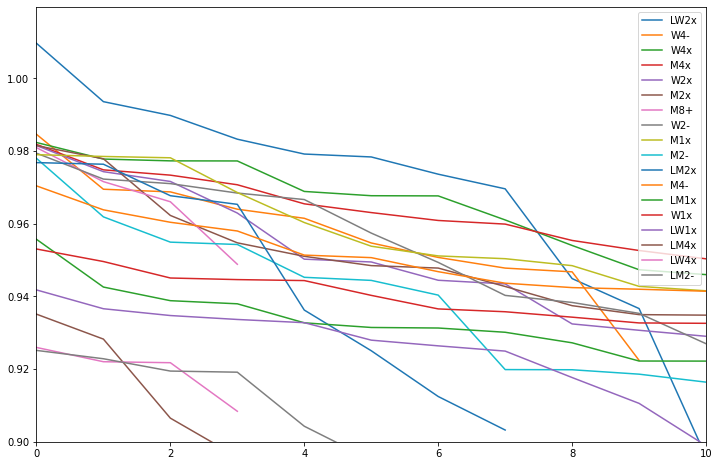

In [5]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();